In [1]:
%reset -f

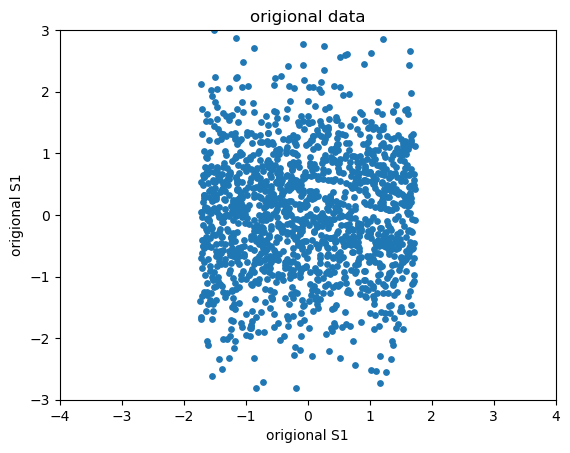

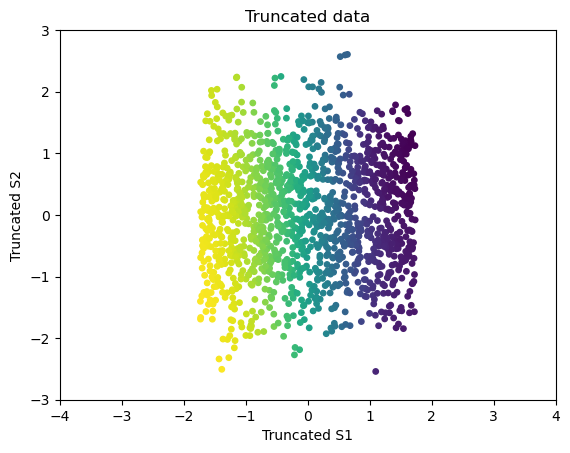

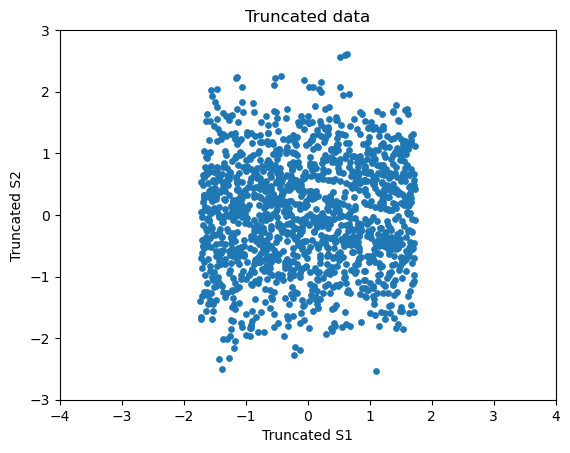

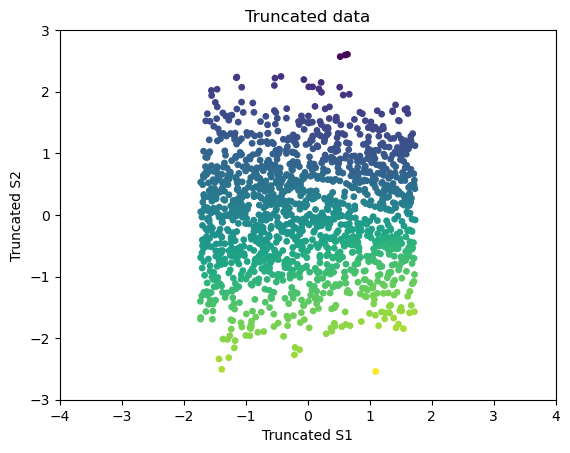

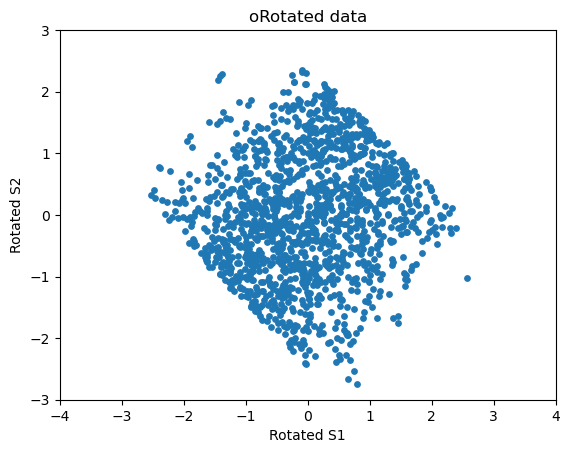

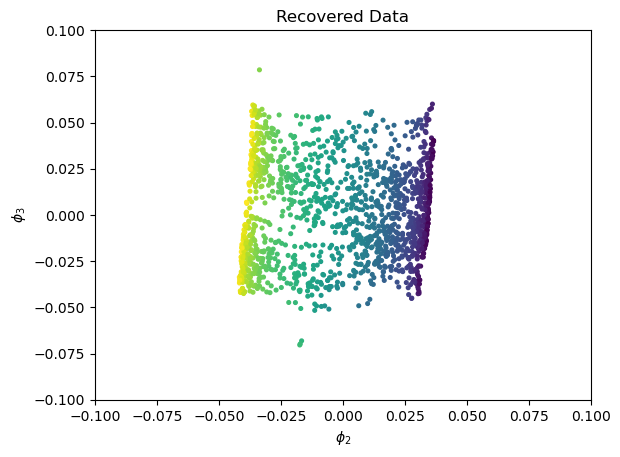

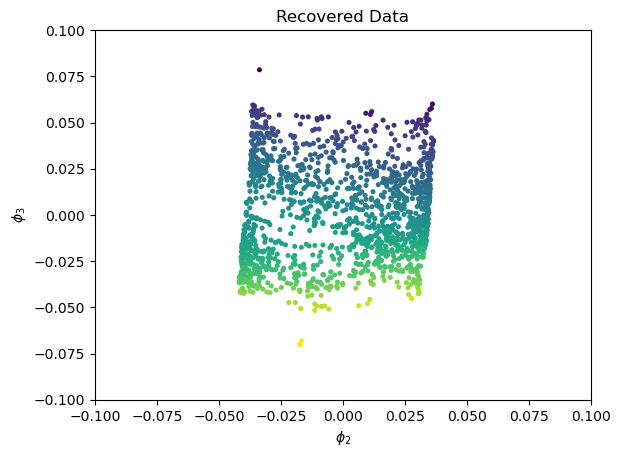

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Parameters
N = 1500
epsilon2 = 0.2
densityThreshold = 3
epsilon = 0.1

# Generating data
S1 = 2*np.sqrt(3)*np.random.rand(N) - np.sqrt(3)
S2 = np.random.normal(0, 1, N)
S = np.vstack((S1, S2)).T

# Filtering isolated points in S
distances_S = cdist(S, S)
isIsolated_S = np.sum(distances_S < epsilon2, axis=1) < densityThreshold
S_filtered = S[~isIsolated_S]

# Rotation
rotationMatrix = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)], [np.sin(np.pi/4), np.cos(np.pi/4)]])
X = rotationMatrix.dot(S_filtered.T).T

# Weight matrix
P, M = X.shape
W = np.zeros((P, P))

for i in range(P):
    for j in range(P):
        distance_squared = np.linalg.norm(X[i, :] - X[j, :])**2
        W[i, j] = np.exp(-distance_squared / (2 * epsilon))

# Eigen decomposition
D = np.diag(W.sum(axis=1))
D_inv = np.diag(1 / np.diag(D))
L = np.eye(P) - np.dot(D_inv, W)

scaled_L = (2/epsilon) * L
eigenvalues, eigenvectors = np.linalg.eig(scaled_L)

# Sorting eigenvalues and eigenvectors in ascending order
idx = eigenvalues.argsort()
sorted_eigenvalues = eigenvalues[idx]
sorted_eigenvectors = eigenvectors[:, idx]

# Selecting eigenvectors corresponding to the second and third smallest eigenvalues
phi_2 = sorted_eigenvectors[:, 1]
phi_3 = sorted_eigenvectors[:, 2]


# Plotting

plt.figure()
plt.scatter(S[:, 0], S[:, 1],s=15)
plt.xlabel('origional S1')
plt.ylabel('origional S1')
plt.colorbar
plt.title('origional data')
plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.show()

plt.figure()
plt.scatter(S_filtered[:, 0], S_filtered[:, 1], c=phi_2,s=15)
plt.xlabel('Truncated S1')
plt.ylabel('Truncated S2')
plt.colorbar
plt.title('Truncated data')
plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.show()

plt.figure()
plt.scatter(S_filtered[:, 0],S_filtered[:, 1], s=15)
plt.xlabel('Truncated S1')
plt.ylabel('Truncated S2')
plt.title('Truncated data')
plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.show()

plt.figure()
plt.scatter(S_filtered[:, 0], S_filtered[:, 1], c=phi_3,s=15)
plt.xlabel('Truncated S1')
plt.ylabel('Truncated S2')
plt.title('Truncated data')
plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.show()




plt.figure()
plt.scatter(X[:, 0], X[:, 1],s=15)
plt.xlabel('Rotated S1')
plt.ylabel('Rotated S2')
plt.title('oRotated data')
plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.show()



plt.figure()
plt.scatter(phi_2, phi_3, c=S_filtered[:, 0], s=7)
plt.xlabel('$\phi_2$')
plt.ylabel('$\phi_3$')
plt.colorbar
plt.title('Recovered Data')
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.show()



plt.figure()
plt.scatter(phi_2, phi_3, c=S_filtered[:, 1], s=7)
plt.xlabel('$\phi_2$')
plt.ylabel('$\phi_3$')
plt.colorbar
plt.title('Recovered Data')
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.show()








